# Mercedes-Benz Greener Manufacturing_Project | Simplilearn 

## <div style="text-align: right"> -Sarvani Nandipati </div>

## Motivation & Aim: 
Reduce the time a Mercedes-Benz spends on the test bench.

## Problem Statement Scenario:

Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

## Tasks to be performed:
1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
2. Check for null and unique values for test and train sets.
3. Apply label encoder.
4. Perform dimensionality reduction.
5. Predict your test_df values using XGBoost.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
 #To display full output in Jupyter, not just last result of a particular cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# To display upto 4000 rows while showing output
pd.options.display.max_rows = 4000

In [4]:
 #uploading training & Test dataset:
train_data = pd.read_csv("../input/mercedesbenz-greener-manufacturing/train.csv")
test_data = pd.read_csv("../input/mercedesbenz-greener-manufacturing/test.csv")

# EDA

In [5]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#calculating dimensions
rows, columns = train_data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  4209 Columns = 378


In [7]:
#checking info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
#checking description
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
X13,4209.0,0.057971,0.233716,0.00,0.00,0.00,0.00,1.00
X14,4209.0,0.428130,0.494867,0.00,0.00,0.00,1.00,1.00
X15,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00
X16,4209.0,0.002613,0.051061,0.00,0.00,0.00,0.00,1.00
X17,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00


In [9]:
#checking duplicated values based on all columns
duplicate = train_data[train_data.duplicated(keep = 'last')]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [ID, y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, ...]
Index: []

[0 rows x 378 columns]


No duplicate cells

# 1. Checking if any columns has the variance equal to zero & then removing those variables.

### Train Data

In [10]:
#Checking which columns has variance 0
a= train_data.var() == 0
a

ID      False
y       False
X10     False
X11      True
X12     False
X13     False
X14     False
X15     False
X16     False
X17     False
X18     False
X19     False
X20     False
X21     False
X22     False
X23     False
X24     False
X26     False
X27     False
X28     False
X29     False
X30     False
X31     False
X32     False
X33     False
X34     False
X35     False
X36     False
X37     False
X38     False
X39     False
X40     False
X41     False
X42     False
X43     False
X44     False
X45     False
X46     False
X47     False
X48     False
X49     False
X50     False
X51     False
X52     False
X53     False
X54     False
X55     False
X56     False
X57     False
X58     False
X59     False
X60     False
X61     False
X62     False
X63     False
X64     False
X65     False
X66     False
X67     False
X68     False
X69     False
X70     False
X71     False
X73     False
X74     False
X75     False
X76     False
X77     False
X78     False
X79     False
X80     False
X81   

In [11]:
#Creating a list of columns whose variance is zero
b = a[a].index.to_list()
b

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [12]:
# dropping columns whose variance is zero
train_data.drop(b, axis = 1,inplace=True)

In [13]:
train_data.dtypes.value_counts()

int64      357
object       8
float64      1
dtype: int64

8 categorical features and 358 numerical features

### Test data

In [14]:
#Dropping test columns whose train column variance is zero 
#(Removing these columns from test data so that both train test have same columns and 
# it is necessary to have same coliumns in train and test data)

test_data.drop(b, axis = 1,inplace=True)
test_data.dtypes.value_counts()

int64     357
object      8
dtype: int64

# 2. Check for null and unique values for test and train sets

In [15]:
train_data.isnull().any().any()

False

In [16]:
test_data.isnull().any().any()

False

### No missing values found in both train and test data

## Checking unique values in each column to understand cardinality

In [17]:
train_data.nunique().sort_values(ascending=False)

ID      4209
y       2545
X0        47
X2        44
X5        29
X1        27
X8        25
X6        12
X3         7
X4         4
X259       2
X256       2
X257       2
X258       2
X263       2
X260       2
X261       2
X262       2
X254       2
X255       2
X249       2
X253       2
X252       2
X251       2
X250       2
X265       2
X248       2
X247       2
X246       2
X245       2
X264       2
X271       2
X266       2
X278       2
X286       2
X285       2
X284       2
X283       2
X282       2
X281       2
X280       2
X279       2
X277       2
X267       2
X276       2
X275       2
X274       2
X273       2
X272       2
X243       2
X270       2
X269       2
X244       2
X238       2
X242       2
X208       2
X216       2
X215       2
X214       2
X213       2
X212       2
X211       2
X210       2
X209       2
X207       2
X218       2
X206       2
X205       2
X204       2
X203       2
X202       2
X201       2
X200       2
X199       2
X217       2
X219       2
X241       2

In [18]:
test_data.nunique().sort_values(ascending=False)

ID      4209
X0        49
X2        45
X5        32
X1        27
X8        25
X6        12
X3         7
X4         4
X251       2
X261       2
X260       2
X259       2
X256       2
X255       2
X254       2
X253       2
X252       2
X246       2
X250       2
X249       2
X248       2
X247       2
X263       2
X245       2
X244       2
X243       2
X242       2
X262       2
X269       2
X264       2
X276       2
X284       2
X283       2
X282       2
X281       2
X280       2
X279       2
X278       2
X277       2
X275       2
X265       2
X274       2
X273       2
X272       2
X271       2
X270       2
X240       2
X267       2
X266       2
X241       2
X234       2
X239       2
X205       2
X213       2
X212       2
X211       2
X210       2
X209       2
X208       2
X207       2
X206       2
X204       2
X215       2
X203       2
X202       2
X201       2
X200       2
X199       2
X198       2
X197       2
X196       2
X214       2
X216       2
X238       2
X227       2
X237       2

# 3. Applying label encoder for categorical features:

In [19]:
#Extracting numeric columns and removing them from all columns and storing it as cat_cols
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['X8', 'X5', 'X3', 'X1', 'X0', 'X4', 'X6', 'X2']

#### Unique values of 'X0','X2','X5' in test data are high indicating presence of new labels. 
#### Created a class 'LabelEncoderExt' which supports these kind of scenerios by assigning a number for unknown labels. 

In [20]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [21]:
# Applying label encoder to columns of train & test data:
for c in cat_cols:
    label_encoder = LabelEncoderExt()
    label_encoder.fit(train_data[c])
    train_data[c] =label_encoder.transform(train_data[c])
    test_data[c]=label_encoder.transform(test_data[c])

# 4. Performing Dimensionality Reduction using PCA

In [22]:
# Storing target variable and dropping it from train data. 
y_train = train_data['y']
del train_data['y']

#Also dropping ID column as it is not important factor to consider
del train_data['ID']

In [23]:
#Also dropping ID column in test data as it is not important factor to consider
test_data_ID=test_data['ID']
del test_data['ID']

In [24]:
# Transforming scaled data to its first 8 principal components.
from sklearn.decomposition import PCA 
pca = PCA(n_components=8)
pca.fit(train_data)
x_pca = pca.transform(train_data)
x_pca.shape

PCA(n_components=8)

(4209, 8)

In [25]:
#Printing the explained variance.
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604, 0.0074454 , 0.00433701])

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

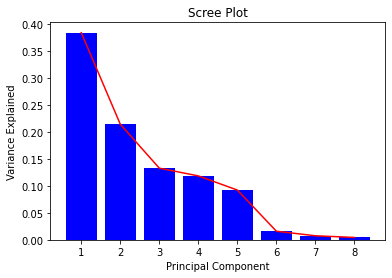

In [26]:
#Scree plot
import matplotlib.pyplot as plt
%matplotlib inline
PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, pca.explained_variance_ratio_, color='blue')
plt.plot(PC_values, pca.explained_variance_ratio_, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

### 94% of the data is captured by first 5 components. So, will be considering 5 components 

In [27]:
#Transforming train data to its first 5 principal components.
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(train_data)
x_train_pca = pca.transform(train_data)
x_train_pca.shape

PCA(n_components=5)

(4209, 5)

In [28]:
x_test_pca = pca.transform(test_data)
x_test_pca.shape

(4209, 5)

# 5. Predicting test_dataframe values using XGBoost.

### Creating valid set, trainset

In [29]:
import xgboost as xg
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

x_train_f, x_valid_f, y_train_f, y_valid_f = train_test_split(x_train_pca, y_train, test_size=0.3,random_state=123)

In [30]:
#Creating train, validation and test feature set:
d_train = xg.DMatrix(x_train_f, label=y_train_f)
d_valid = xg.DMatrix(x_valid_f, label=y_valid_f)
d_test = xg.DMatrix(x_test_pca)

In [31]:
# Setting the parameters for XGB
param = {'objective': 'reg:linear', 'eta': 0.03, 'max_depth': 4}
xgb_r = xg.train(params=param,dtrain = d_train, num_boost_round = 10)
y_train_pred = xgb_r.predict(d_train)
y_valid_pred = xgb_r.predict(d_valid)
y_test_pred = xgb_r.predict(d_test)

[16:11:55] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


## Evaluating model performance Metrics:

In [32]:
from sklearn.metrics import r2_score 

# Calculating R^2 score for train and test
R_square_train = r2_score(y_train_pred, y_train_f) 
R_square_valid = r2_score(y_valid_pred, y_valid_f) 
print('R^2 train:', R_square_train) 
print('R^2 valid set:', R_square_valid) 

R^2 train: -2447.975955655754
R^2 valid set: -2439.5525358364634


In [33]:
### ----- RMSE Computation for train and valid sets------###
# Train set
rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
print("RMSE of train data: % f" %(rmse_train))

#Valid set
rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
print("RMSE of valid set data : % f" %(rmse_valid))

RMSE of train data:  74.899321
RMSE of valid set data :  74.824379


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Train data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

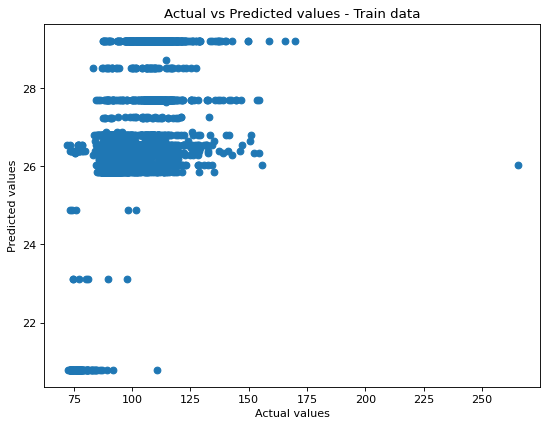

In [34]:
from matplotlib.pyplot import figure
# Actual vs Predicted on Train data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train_f,y_train_pred)
plt.title("Actual vs Predicted values - Train data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Validation data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

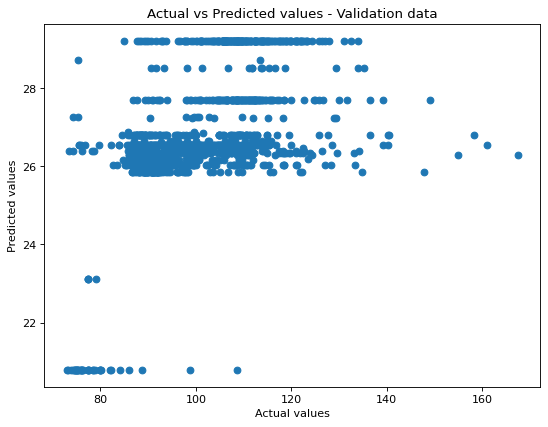

In [35]:
# Actual vs Predicted on Validation data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_valid_f,y_valid_pred)
plt.title("Actual vs Predicted values - Validation data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## Inferences: 
1. From the plots it is clear that the param values given are doing extreme pruning leading to a constant value. 
2. R^2 value tend to be negative indicating model built is a worst fit and predicted values are worse than considering mean for all observations

### So, there is a need for  Hyper parameter Tuning! 

# XG Boost +  Hyper parameter Tuning (Bayesian Optimisation Technique)

Grid Search, Randomised Search are quite time-consuming and computationally Expensive if we have many Hyper parameters. So, Bayesian Optimisation Technique is used


In [36]:
# Trying Bayesian HPT Technique
# import machine learning libraries
import xgboost as xg

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [37]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 123,
       'subsample': [0.5, 0.7],
       
    }

In [38]:
def objective(space):
    clf=xg.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_f, y_train_f), ( x_valid_f, y_valid_f)]
    
    clf.fit(x_train_f, y_train_f,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    
    y_train_pred = clf.predict(x_train_f)
    y_valid_pred = clf.predict(x_valid_f)
    
    # Calculating R^2 score for train and valid
    R_square_train = r2_score(y_train_pred, y_train_f) 
    R_square_valid = r2_score(y_valid_pred, y_valid_f)
    
    # RMSE Computation for train and valid sets
    rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
    rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
    print('R2 valid',R_square_valid,'RMSE valid',rmse_valid)
    return {'loss': -R_square_valid,'status': STATUS_OK}

In [39]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R2 valid
-1.9052757160387483
RMSE valid
10.672626337546799
R2 valid
-1.9303512049176788
RMSE valid
10.742133729822832
R2 valid
-2.1156182118241316
RMSE valid
10.659407598587668
R2 valid
-1.6743718839685013
RMSE valid
10.64327236781633
R2 valid
-2.2309941725731686
RMSE valid
10.67493007237063
R2 valid
-1.6271671998690724
RMSE valid
10.628043403419396
R2 valid
-2.1654521839440406
RMSE valid
10.649661737589746
R2 valid
-2.1201183123444176
RMSE valid
10.655490819356649
R2 valid
-1.8511344491954422
RMSE valid
10.667460284869124
R2 valid
-2.403838546118239
RMSE valid
10.723456105449007
R2 valid
-2.2956241808132827
RMSE valid
10.735747103016935
R2 valid
-2.051108373282793
RMSE valid
10.685166313136047
R2 valid
-1.813096978172437
RMSE valid
10.708113393696182
R2 valid
-2.23898166592694
RMSE valid
10.660857159976253
R2 valid
-1.784196537253047
RMSE valid
10.645106932453388
R2 valid
-1.6895470495597862
RMSE valid
10.615193922917959
R2 valid
-1.5461933364334022
RMSE valid
10.676343473295498
R2 va

In [40]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7176783980519787, 'gamma': 4.825186925910737, 'max_depth': 5.0, 'min_child_weight': 5.0, 'reg_alpha': 65.0, 'reg_lambda': 0.7402138908908844}


In [41]:
clf = xg.XGBRegressor(n_estimators =space['n_estimators'], max_depth = 7, gamma = 6.024106320094491,
                    reg_alpha = 103.0,min_child_weight=2,reg_lambda= 0.7081851509503654,
                    colsample_bytree=0.6987038361875731)

clf.fit(x_train_f, y_train_f,eval_set=[( x_train_f, y_train_f), ( x_valid_f, y_valid_f)], eval_metric="rmse",early_stopping_rounds=10,verbose=False)
y_train_pred = clf.predict(x_train_f)
y_valid_pred = clf.predict(x_valid_f)
y_test_pred = clf.predict(x_test_pca)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.6987038361875731, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=6.024106320094491, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=180, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=103.0, reg_lambda=0.7081851509503654, ...)

In [42]:
from sklearn.metrics import r2_score 

# Calculating R^2 score for train and test
R_square_train = r2_score(y_train_pred, y_train_f) 
R_square_valid = r2_score(y_valid_pred, y_valid_f) 
print('R^2 train:', R_square_train) 
print('R^2 valid set:', R_square_valid) 

### ----- RMSE Computation for train and valid sets------###
# Train set
rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
print("RMSE of train data: % f" %(rmse_train))

#Valid set
rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
print("RMSE of valid set data : % f" %(rmse_valid))

R^2 train: 0.1047642343376386
R^2 valid set: -0.6154285190999595
RMSE of train data:  7.875622
RMSE of valid set data :  9.896832


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Train data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

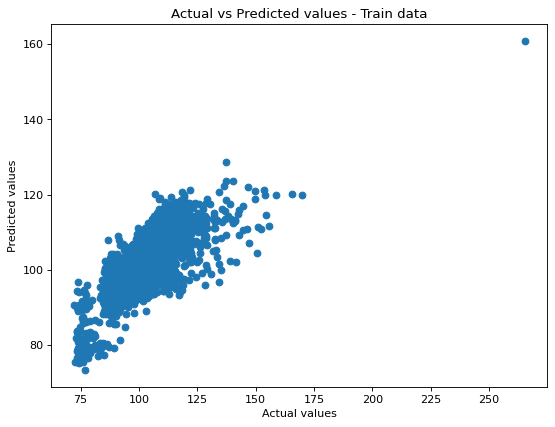

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Validation data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

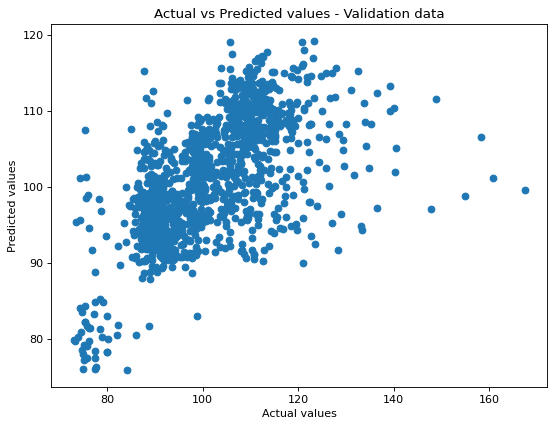

In [43]:
# Actual vs Predicted on Train data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train_f,y_train_pred)
plt.title("Actual vs Predicted values - Train data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

# Actual vs Predicted on Validation data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_valid_f,y_valid_pred)
plt.title("Actual vs Predicted values - Validation data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

## Inferences:
1. Hyperparameter tuning improved R^2 values and RMSE values significantly better. An almost linear relationship is observed between actual vs predicted values
2. However, model still suffers with the issue of heteroscadicity and overfitting! It performs well on training data but not on test data. 
3. Trying other ML models may further improve the performance.

# Predicted values on test set

In [44]:
y_test_pred_df= pd.DataFrame(y_test_pred)
y_test_pred_df.set_index(test_data_ID, inplace=True)

In [45]:
y_test_pred_df

,0
ID,
1,81.079987
2,98.743385
3,96.933510
4,87.289810
5,100.647903
...,...
8410,107.893066
8411,95.310074
8413,103.483246


# If you found this file useful, don't forget to upvote and comment on the document. Your opinion matters!